In [37]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [38]:
omicron_data = pd.read_csv("D:\\omicron_data\\omicron.csv") 
omicron_data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False


In [39]:
omicron_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66168 entries, 0 to 66167
Data columns (total 16 columns):
id                  66168 non-null int64
user_name           66168 non-null object
user_location       51380 non-null object
user_description    62338 non-null object
user_created        66168 non-null object
user_followers      66168 non-null int64
user_friends        66168 non-null int64
user_favourites     66168 non-null int64
user_verified       66168 non-null bool
date                66168 non-null object
text                66168 non-null object
hashtags            47798 non-null object
source              66168 non-null object
retweets            66168 non-null int64
favorites           66168 non-null int64
is_retweet          66168 non-null bool
dtypes: bool(2), int64(6), object(8)
memory usage: 7.2+ MB


In [40]:
omicron_data['source'].value_counts()[:5]

Twitter Web App        23063
Twitter for Android    15166
Twitter for iPhone     13603
smcapplication          3198
TweetDeck               3005
Name: source, dtype: int64

In [41]:
source_to_replace = ['Twitter Web App', 'Twitter for Android','Twitter for iPhone','Twitter for iPad','Twitter Media Studio','Twitter Media Studio - LiveCut','Twitter for Mac']
omicron_data['source'] = omicron_data['source'].replace(source_to_replace, "Twitter")

In [42]:
# Top 10 platforms to share comments
omicron_data['source'].value_counts()[:10]

Twitter                   54581
smcapplication             3198
TweetDeck                  3005
Hootsuite Inc.             1105
Buffer                      547
WordPress.com               284
dlvr.it                     238
Sprout Social               197
SocialFlow                  135
Hocalwire Social Share      112
Name: source, dtype: int64

In [43]:
#convert into a dataframe
df = omicron_data['source'].value_counts()[:5].rename_axis('source').reset_index(name = 'counts')
df

,source,counts
0,Twitter,54581
1,smcapplication,3198
2,TweetDeck,3005
3,Hootsuite Inc.,1105
4,Buffer,547


In [44]:
omicron_data['user_location'].value_counts()

Los Angeles, CA                   3418
India                             3130
New Delhi, India                   992
London, England                    677
Mumbai, India                      640
London                             519
United States                      512
United Kingdom                     504
Canada                             503
New Delhi                          481
New York, NY                       364
Hyderabad, India                   325
UK                                 319
Mumbai                             304
USA                                292
Chennai, India                     270
Australia                          267
England, United Kingdom            238
Toronto, Ontario                   229
Toronto-Citizen of Canada & US     225
Washington, DC                     224
Bengaluru, India                   219
South Africa                       205
London, UK                         193
Earth                              180
Boston, MA               

In [45]:
# top 10 user locations where we got max comments
df1 = omicron_data['user_location'].value_counts()[:10].rename_axis('source_country').reset_index(name = 'counts')
df1

,source_country,counts
0,"Los Angeles, CA",3418
1,India,3130
2,"New Delhi, India",992
3,"London, England",677
4,"Mumbai, India",640
5,London,519
6,United States,512
7,United Kingdom,504
8,Canada,503
9,New Delhi,481


### Need to do country and Hashtag cleaning due to irregular text (not including in this notebook)

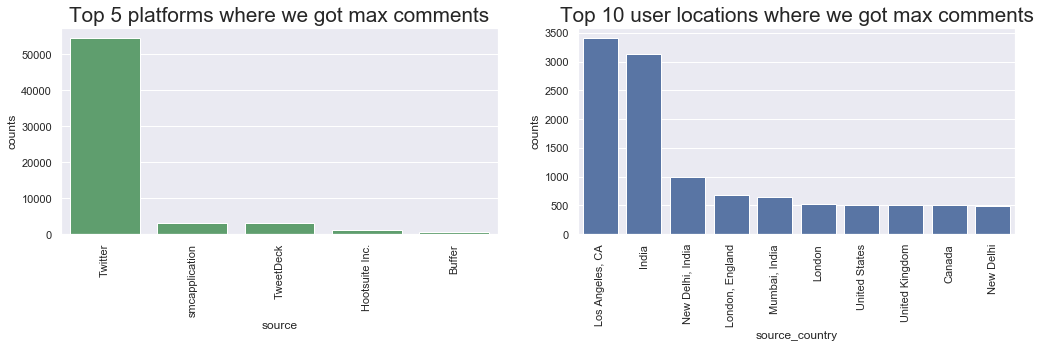

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.barplot(x = 'source', y = 'counts', data = df, color = 'g',ax = ax[0] )
ax[0].set_title('Top 5 platforms where we got max comments', size = 'xx-large')
ax[0].set_xticklabels(df['source'],rotation = 90)

sns.barplot(x = 'source_country', y = 'counts', data = df1, color = 'b',ax = ax[1] )
ax[1].set_title('Top 10 user locations where we got max comments', size = 'xx-large')
ax[1].set_xticklabels(df1['source_country'],rotation = 90)

plt.tight_layout()
plt.show()

In [47]:
# convert str date into datetime stamps
omicron_data['date'] = pd.to_datetime(omicron_data['user_created'])

In [48]:
omicron_data['year'] = omicron_data['date'].dt.year
omicron_data['month'] = omicron_data['date'].dt.month
omicron_data['day'] = omicron_data['date'].dt.day
omicron_data['hour'] = omicron_data['date'].dt.hour

In [49]:
omicron_data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [50]:
omicron_data[['user_created','year', 'month', 'day', 'hour']].head(10)

,user_created,year,month,day,hour
0,2009-09-16 14:30:32,2009,9,16,14
1,2019-12-28 14:29:13,2019,12,28,14
2,2021-07-10 09:40:57,2021,7,10,9
3,2009-05-21 08:32:19,2009,5,21,8
4,2013-12-31 02:57:32,2013,12,31,2
5,2013-09-12 19:39:51,2013,9,12,19
6,2016-09-22 22:54:53,2016,9,22,22
7,2009-10-10 07:16:32,2009,10,10,7
8,2021-08-14 07:19:11,2021,8,14,7
9,2010-11-27 15:34:06,2010,11,27,15


In [51]:
omicron_data[['year', 'month', 'day', 'hour']].columns

Index(['year', 'month', 'day', 'hour'], dtype='object')

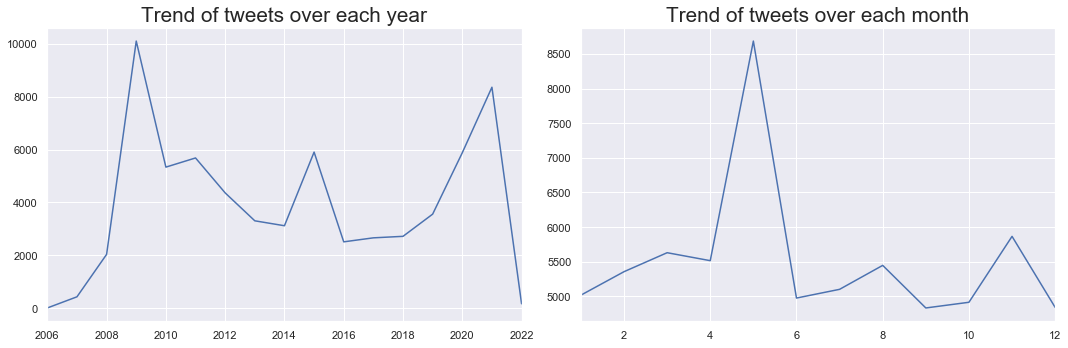

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

omicron_data['year'].value_counts().sort_index(ascending = True).plot(ax = ax[0], kind = 'line')
ax[0].set_title('Trend of tweets over each year', size = 'xx-large')
# ax[0].set_xticklabels(df['source'],rotation = 90)

omicron_data['month'].value_counts().sort_index(ascending = True).plot(ax = ax[1], kind = 'line')
ax[1].set_title('Trend of tweets over each month', size = 'xx-large')
# ax[1].set_xticklabels(df1['source_country'],rotation = 90)

plt.tight_layout()
plt.show()

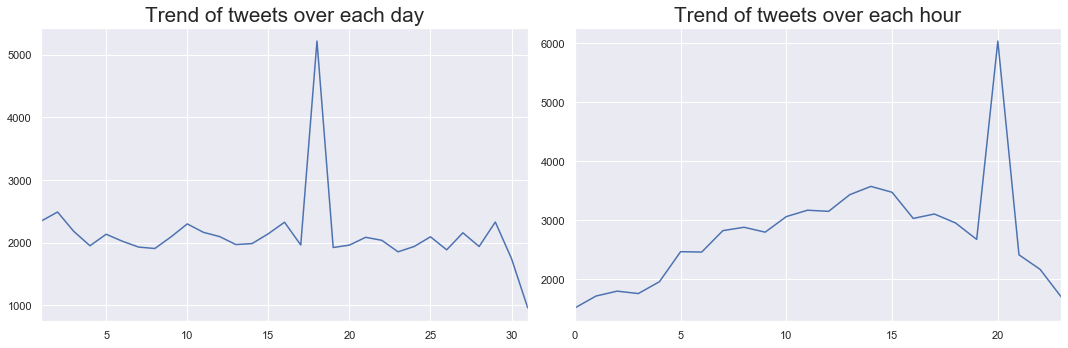

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

omicron_data['day'].value_counts().sort_index(ascending = True).plot(ax = ax[0], kind = 'line')
ax[0].set_title('Trend of tweets over each day', size = 'xx-large')

omicron_data['hour'].value_counts().sort_index(ascending = True).plot(ax = ax[1], kind = 'line')
ax[1].set_title('Trend of tweets over each hour', size = 'xx-large')


plt.tight_layout()
plt.show()

In [54]:
omicron_data['hashtags'] = omicron_data['hashtags'].str.strip('[]').str.replace("'", '')

In [55]:
omicron_data['hashtags'].mode()[0]

'Omicron'

In [56]:
omicron_data['hashtags'] = omicron_data['hashtags'].fillna(omicron_data['hashtags'].mode()[0])

In [57]:
omicron_data['hashtags'] = omicron_data['hashtags'].apply(lambda x : x.split(',')[0])

In [58]:
omicron_data['hashtags'].value_counts()[:20]

Omicron             38462
omicron              3760
COVID19              2799
COVID                 466
Covid19               452
Covid                 411
OmicronVariant        393
covid                 291
BREAKING              277
covid19               273
OmicronVarient        266
OMICRON               262
India                 235
coronavirus           218
BlackLivesMatter      199
UK                    187
Delta                 174
SouthAfrica           174
HDFCLIFE              160
Pfizer                147
Name: hashtags, dtype: int64

### Our objective is to clean Text data and get insights & sentiment analysis

In [59]:
text_data = omicron_data['text']
text_data.head()

0    @SkyNews "Told you I'd be Back!" #OMICRON “Odi...
1    Someone told me this in October #Omicron https...
2    Glad to see the public schoolkids are wrapping...
3    #Automation systems have become increasingly c...
4    🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...
Name: text, dtype: object

In [60]:
text_data = text_data.reset_index()
text_data.head()

,index,text
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi..."
1,1,Someone told me this in October #Omicron https...
2,2,Glad to see the public schoolkids are wrapping...
3,3,#Automation systems have become increasingly c...
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If..."
